In [4]:
# Import necessary libraries:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore') 
# setting ignore as a parameter

In [5]:
# Load the dataset:
df=pd.read_csv("C:\DATASCIENCE\DATASET\kaggle\Drinking_Water_Quality_Distribution_Monitoring_Data.csv")

##### DATA SOURCE:    [Kaggle](https://www.kaggle.com/datasets/meetnagadia/drinking-water-quality-distributionmonitoring)

In [6]:
#pd.options.display.max_rows=100000

In [7]:
df

,Sample Number,Sample Date,Sample Time,Sample Site,Sample class,Residual Free Chlorine (mg/L),Turbidity (NTU),Fluoride (mg/L),Coliform (Quanti-Tray) (MPN /100mL),E.coli(Quanti-Tray) (MPN/100mL)
0,202120243,07/01/2021,10:31,23650,Compliance,0.22,0.84,NaN,<1,<1
1,202120244,07/01/2021,09:54,29550,Compliance,0.69,0.81,NaN,<1,<1
2,202120245,07/01/2021,07:52,50200,Operational,0.55,0.77,NaN,<1,<1
3,202120246,07/01/2021,08:12,50250,Compliance,0.87,0.81,NaN,<1,<1
4,202120247,07/01/2021,08:31,50300,Operational,0.80,0.84,NaN,<1,<1
...,...,...,...,...,...,...,...,...,...,...
126254,202307968,03/31/2023,09:47,1S07,Operational,0.74,0.63,NaN,<1,<1
126255,202307969,03/31/2023,12:12,32750,Compliance,0.41,0.65,NaN,<1,<1
126256,202307970,03/31/2023,08:35,33150,Compliance,0.43,0.3,NaN,<1,<1
126257,202307971,03/31/2023,11:38,33850,Compliance,0.44,0.68,NaN,<1,<1


In [8]:
df.columns

Index(['Sample Number', 'Sample Date', 'Sample Time', 'Sample Site',
       'Sample class', 'Residual Free Chlorine (mg/L)', 'Turbidity (NTU)',
       'Fluoride (mg/L)', 'Coliform (Quanti-Tray) (MPN /100mL)',
       'E.coli(Quanti-Tray) (MPN/100mL)'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126259 entries, 0 to 126258
Data columns (total 10 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Sample Number                        126259 non-null  int64  
 1   Sample Date                          126259 non-null  object 
 2   Sample Time                          126259 non-null  object 
 3   Sample Site                          126257 non-null  object 
 4   Sample class                         126259 non-null  object 
 5   Residual Free Chlorine (mg/L)        126257 non-null  float64
 6   Turbidity (NTU)                      126258 non-null  object 
 7   Fluoride (mg/L)                      16613 non-null   object 
 8   Coliform (Quanti-Tray) (MPN /100mL)  126198 non-null  object 
 9   E.coli(Quanti-Tray) (MPN/100mL)      126198 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 9.6+ MB


# Data Wrangling

In [10]:
df.rename(columns = 
                {
            "Residual Free Chlorine (mg/L)" : "Residual_Free_chlorine", 
            "Turbidity (NTU)" : "Turbidity", 
            "Fluoride (mg/L)" : "Fluoride", 
            "Coliform (Quanti-Tray) (MPN /100mL)" : "Coliform", 
            "E.coli(Quanti-Tray) (MPN/100mL)" : "Ecoli"
                }, 
            inplace = True
               )

In [11]:
# convert the datatype of columns
# Let us remove all special charaters from columns and convert them to float 
# becuase if converted directly rows with special charecters will converted to NaN values that will create more missing values in df

df["Residual_Free_chlorine"] = df["Residual_Free_chlorine"].astype(str)
df["Residual_Free_chlorine"] = df["Residual_Free_chlorine"].apply(lambda x: x.replace("<", ""))
df["Residual_Free_chlorine"] = df["Residual_Free_chlorine"].apply(lambda x: x.replace(">", ""))
df["Residual_Free_chlorine"] = df["Residual_Free_chlorine"].apply(lambda x: x.replace(" ", ""))

In [12]:
#convert data type of column to float
df["Residual_Free_chlorine"] = df["Residual_Free_chlorine"].astype(float)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126259 entries, 0 to 126258
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Sample Number           126259 non-null  int64  
 1   Sample Date             126259 non-null  object 
 2   Sample Time             126259 non-null  object 
 3   Sample Site             126257 non-null  object 
 4   Sample class            126259 non-null  object 
 5   Residual_Free_chlorine  126257 non-null  float64
 6   Turbidity               126258 non-null  object 
 7   Fluoride                16613 non-null   object 
 8   Coliform                126198 non-null  object 
 9   Ecoli                   126198 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 9.6+ MB


In [14]:
df["Turbidity"] = df["Turbidity"].astype(str)
df["Turbidity"] = df["Turbidity"].apply(lambda x: x.replace("<", ""))
df["Turbidity"] = df["Turbidity"].apply(lambda x: x.replace(">", ""))
df["Turbidity"] = df["Turbidity"].apply(lambda x: x.replace(" ", ""))
df["Turbidity"] = df["Turbidity"].astype(float)

In [15]:
df["Fluoride"] = df["Fluoride"].astype(str)
df["Fluoride"] = df["Fluoride"].apply(lambda x: x.replace("<", ""))
df["Fluoride"] = df["Fluoride"].apply(lambda x: x.replace(">", ""))
df["Fluoride"] = df["Fluoride"].apply(lambda x: x.replace(" ", ""))
df["Fluoride"] = df["Fluoride"].astype(float)

In [16]:
df["Coliform"] = df["Coliform"].astype(str)
df["Coliform"] = df["Coliform"].apply(lambda x: x.replace("<", ""))
df["Coliform"] = df["Coliform"].apply(lambda x: x.replace(">", ""))
df["Coliform"] = df["Coliform"].apply(lambda x: x.replace(" ", ""))
df["Coliform"] = df["Coliform"].astype(float)

In [17]:
df["Ecoli"] = df["Ecoli"].astype(str)
df["Ecoli"] = df["Ecoli"].apply(lambda x: x.replace("<", ""))
df["Ecoli"] = df["Ecoli"].apply(lambda x: x.replace(">", ""))
df["Ecoli"] = df["Ecoli"].apply(lambda x: x.replace(" ", ""))
df["Ecoli"] = df["Ecoli"].astype(float)

In [18]:
df

,Sample Number,Sample Date,Sample Time,Sample Site,Sample class,Residual_Free_chlorine,Turbidity,Fluoride,Coliform,Ecoli
0,202120243,07/01/2021,10:31,23650,Compliance,0.22,0.84,NaN,1.0,1.0
1,202120244,07/01/2021,09:54,29550,Compliance,0.69,0.81,NaN,1.0,1.0
2,202120245,07/01/2021,07:52,50200,Operational,0.55,0.77,NaN,1.0,1.0
3,202120246,07/01/2021,08:12,50250,Compliance,0.87,0.81,NaN,1.0,1.0
4,202120247,07/01/2021,08:31,50300,Operational,0.80,0.84,NaN,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
126254,202307968,03/31/2023,09:47,1S07,Operational,0.74,0.63,NaN,1.0,1.0
126255,202307969,03/31/2023,12:12,32750,Compliance,0.41,0.65,NaN,1.0,1.0
126256,202307970,03/31/2023,08:35,33150,Compliance,0.43,0.30,NaN,1.0,1.0
126257,202307971,03/31/2023,11:38,33850,Compliance,0.44,0.68,NaN,1.0,1.0


In [19]:
df.info()
# now datatype of 5 columns have been changed to float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126259 entries, 0 to 126258
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Sample Number           126259 non-null  int64  
 1   Sample Date             126259 non-null  object 
 2   Sample Time             126259 non-null  object 
 3   Sample Site             126257 non-null  object 
 4   Sample class            126259 non-null  object 
 5   Residual_Free_chlorine  126257 non-null  float64
 6   Turbidity               126258 non-null  float64
 7   Fluoride                16613 non-null   float64
 8   Coliform                126198 non-null  float64
 9   Ecoli                   126198 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 9.6+ MB


In [20]:
df.describe()

,Sample Number,Residual_Free_chlorine,Turbidity,Fluoride,Coliform,Ecoli
count,1.262590e+05,126257.000000,126258.000000,16613.000000,126198.000000,126198.000000
mean,2.018770e+08,0.570886,0.725889,0.709962,1.128873,1.000008
std,2.318384e+05,0.212605,0.265837,0.058283,4.590446,0.002815
min,2.015000e+08,0.000000,0.100000,0.030000,1.000000,1.000000
25%,2.017005e+08,0.430000,0.620000,0.690000,1.000000,1.000000
50%,2.018386e+08,0.580000,0.730000,0.710000,1.000000,1.000000
75%,2.021012e+08,0.720000,0.850000,0.730000,1.000000,1.000000
max,2.023080e+08,2.200000,33.800000,0.890000,200.500000,2.000000


In [21]:
# Missing values
o=df.isna().sum()
o

Sample Number                  0
Sample Date                    0
Sample Time                    0
Sample Site                    2
Sample class                   0
Residual_Free_chlorine         2
Turbidity                      1
Fluoride                  109646
Coliform                      61
Ecoli                         61
dtype: int64

In [22]:
# remove any rows from the DataFrame df that have missing values in the 'sample site' column. 
df1 = df.dropna(subset=['Sample Site'])

In [23]:
o=df1.isna().sum()
o

Sample Number                  0
Sample Date                    0
Sample Time                    0
Sample Site                    0
Sample class                   0
Residual_Free_chlorine         2
Turbidity                      1
Fluoride                  109644
Coliform                      61
Ecoli                         61
dtype: int64

In [24]:
df1

,Sample Number,Sample Date,Sample Time,Sample Site,Sample class,Residual_Free_chlorine,Turbidity,Fluoride,Coliform,Ecoli
0,202120243,07/01/2021,10:31,23650,Compliance,0.22,0.84,NaN,1.0,1.0
1,202120244,07/01/2021,09:54,29550,Compliance,0.69,0.81,NaN,1.0,1.0
2,202120245,07/01/2021,07:52,50200,Operational,0.55,0.77,NaN,1.0,1.0
3,202120246,07/01/2021,08:12,50250,Compliance,0.87,0.81,NaN,1.0,1.0
4,202120247,07/01/2021,08:31,50300,Operational,0.80,0.84,NaN,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
126254,202307968,03/31/2023,09:47,1S07,Operational,0.74,0.63,NaN,1.0,1.0
126255,202307969,03/31/2023,12:12,32750,Compliance,0.41,0.65,NaN,1.0,1.0
126256,202307970,03/31/2023,08:35,33150,Compliance,0.43,0.30,NaN,1.0,1.0
126257,202307971,03/31/2023,11:38,33850,Compliance,0.44,0.68,NaN,1.0,1.0


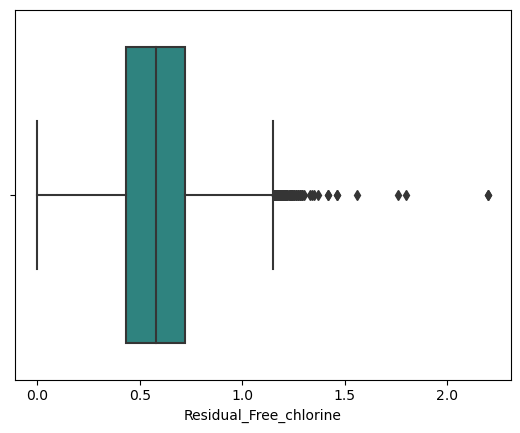

In [25]:
# Outliers
sns.boxplot(x='Residual_Free_chlorine',data=df1,palette="viridis");

In [26]:
# Max threshold
df1['Residual_Free_chlorine'].quantile(.996)

1.1

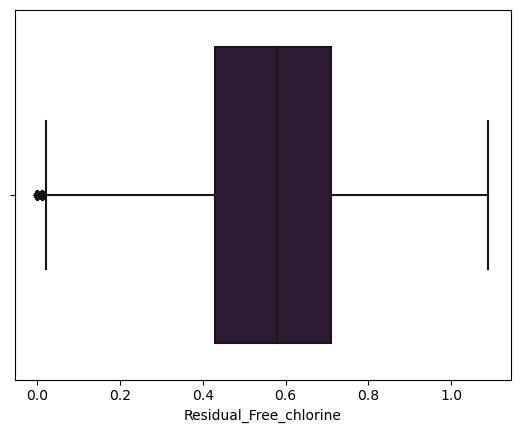

In [27]:
sns.boxplot(x='Residual_Free_chlorine',\
            data=df1[df['Residual_Free_chlorine']<1.1],\
           palette="twilight");

In [28]:
# Min threshold
df1['Residual_Free_chlorine'].quantile(.0005)

0.01

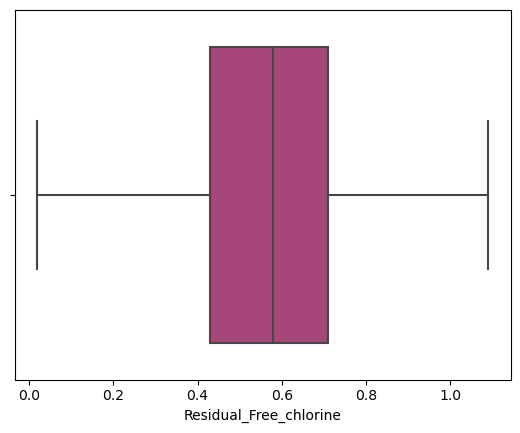

In [29]:
sns.boxplot(x='Residual_Free_chlorine',\
            data=df1[(df1['Residual_Free_chlorine']>0.01) & \
                    (df1['Residual_Free_chlorine']<1.1)],\
           palette="magma");

In [30]:
max_thres=df1['Residual_Free_chlorine'].quantile(.996)
#or
min_thres=0.01

In [31]:
df1[df1['Residual_Free_chlorine']<min_thres].head()

,Sample Number,Sample Date,Sample Time,Sample Site,Sample class,Residual_Free_chlorine,Turbidity,Fluoride,Coliform,Ecoli
1867,202125440,08/13/2021,07:17,78050,Compliance,0.0,0.50,NaN,1.0,1.0
3214,202129049,09/13/2021,09:22,23900,Operational,0.0,0.67,NaN,1.0,1.0
4242,202131654,10/06/2021,09:16,23900,Operational,0.0,0.47,NaN,1.0,1.0
8324,202204653,02/10/2022,11:56,53500,Operational,0.0,0.55,NaN,1.0,1.0
10235,202209523,03/27/2022,12:33,77750,Compliance,0.0,0.79,NaN,1.0,1.0


In [32]:
 #creating a boolean mask to filter out the rows containg outliers
outliers_mask = (df1['Residual_Free_chlorine'] > max_thres) & \
(df1['Residual_Free_chlorine'] < min_thres)

In [33]:
df1[outliers_mask] = np.nan

In [34]:
#df1.dropna(inplace=True)

In [35]:
# Replace missing values with interpolated values
o=df1.isna().sum()
o

Sample Number                  0
Sample Date                    0
Sample Time                    0
Sample Site                    0
Sample class                   0
Residual_Free_chlorine         2
Turbidity                      1
Fluoride                  109644
Coliform                      61
Ecoli                         61
dtype: int64

In [36]:
df2=df1.interpolate(method='polynomial',order=2)

In [37]:
#after interpolation
o=df2.isna().sum()
o

Sample Number              0
Sample Date                0
Sample Time                0
Sample Site                0
Sample class               0
Residual_Free_chlorine     0
Turbidity                  0
Fluoride                  25
Coliform                   0
Ecoli                      0
dtype: int64

In [38]:
#droping the remaing missing values
df3=df2.dropna()

In [39]:
#after dropping
o=df3.isna().sum()
o

Sample Number             0
Sample Date               0
Sample Time               0
Sample Site               0
Sample class              0
Residual_Free_chlorine    0
Turbidity                 0
Fluoride                  0
Coliform                  0
Ecoli                     0
dtype: int64

In [40]:
#cleaned dataset
df3

,Sample Number,Sample Date,Sample Time,Sample Site,Sample class,Residual_Free_chlorine,Turbidity,Fluoride,Coliform,Ecoli
18,202120277.0,07/01/2021,08:18,1S03,Operational,0.72,0.72,0.71,1.0,1.0
19,202120278.0,07/01/2021,09:41,1S03A,Operational,0.92,0.78,0.73,1.0,1.0
20,202120279.0,07/01/2021,09:17,1S03B,Operational,0.72,0.76,0.72,11.1,1.0
21,202120280.0,07/01/2021,08:36,1SCH3,Operational,0.64,0.97,0.72,1.0,1.0
22,202120281.0,07/01/2021,08:44,1SCL1,Operational,0.81,0.18,0.69,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
126247,202307961.0,03/31/2023,08:05,1S03,Operational,0.65,0.58,0.70,1.0,1.0
126248,202307962.0,03/31/2023,09:39,1S03A,Operational,0.81,0.71,0.69,1.0,1.0
126249,202307963.0,03/31/2023,09:07,1S03B,Operational,0.69,0.68,0.69,1.0,1.0
126250,202307964.0,03/31/2023,07:29,1SCH3,Operational,0.60,0.66,0.69,1.0,1.0


In [41]:
#original dataset
df

,Sample Number,Sample Date,Sample Time,Sample Site,Sample class,Residual_Free_chlorine,Turbidity,Fluoride,Coliform,Ecoli
0,202120243,07/01/2021,10:31,23650,Compliance,0.22,0.84,NaN,1.0,1.0
1,202120244,07/01/2021,09:54,29550,Compliance,0.69,0.81,NaN,1.0,1.0
2,202120245,07/01/2021,07:52,50200,Operational,0.55,0.77,NaN,1.0,1.0
3,202120246,07/01/2021,08:12,50250,Compliance,0.87,0.81,NaN,1.0,1.0
4,202120247,07/01/2021,08:31,50300,Operational,0.80,0.84,NaN,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
126254,202307968,03/31/2023,09:47,1S07,Operational,0.74,0.63,NaN,1.0,1.0
126255,202307969,03/31/2023,12:12,32750,Compliance,0.41,0.65,NaN,1.0,1.0
126256,202307970,03/31/2023,08:35,33150,Compliance,0.43,0.30,NaN,1.0,1.0
126257,202307971,03/31/2023,11:38,33850,Compliance,0.44,0.68,NaN,1.0,1.0


# Analysis

## Hypothesis:Sample class has an affect in water quality

<Axes: >

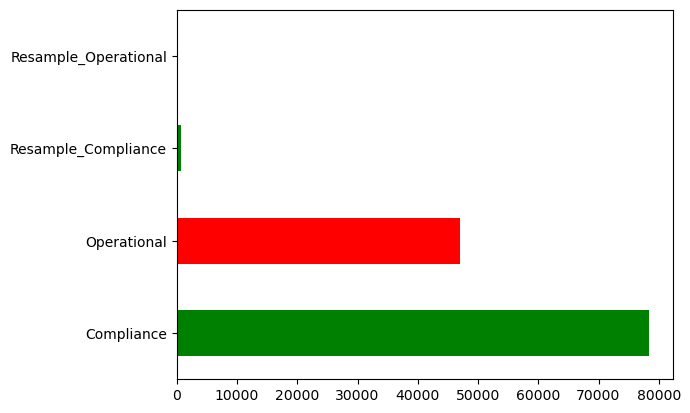

In [42]:
# dustribution of sample class 
df3['Sample class'].value_counts()\
.plot(kind='barh',\
      color=['green','red', 'green','red',])

In [43]:
# Sorting data with Fluoride ,coliform
dfsrt1=df3.sort_values(by=['Fluoride','Coliform'],\
                      ascending=False)
dfsrt1

,Sample Number,Sample Date,Sample Time,Sample Site,Sample class,Residual_Free_chlorine,Turbidity,Fluoride,Coliform,Ecoli
61082,201735881.0,12/18/2017,13:31,46850,Compliance,0.78,0.79,6.559205,1.0,1.0
61083,201735882.0,12/18/2017,11:01,50200,Operational,0.54,0.77,6.548591,1.0,1.0
61081,201735880.0,12/18/2017,09:09,45700,Operational,0.80,0.88,6.515723,1.0,1.0
61084,201735883.0,12/18/2017,11:25,50250,Compliance,0.61,0.84,6.483882,1.0,1.0
61080,201735879.0,12/18/2017,09:46,45250,Compliance,0.75,0.88,6.418146,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
34754,201644306.0,04/25/2016,10:49,35000,Operational,0.37,0.75,-9.621146,1.0,1.0
34750,201644302.0,04/25/2016,10:20,27000,Operational,0.68,0.95,-9.668108,1.0,1.0
34753,201644305.0,04/25/2016,12:13,34150,Compliance,0.52,0.83,-9.687141,1.0,1.0
34751,201644303.0,04/25/2016,08:55,30350,Compliance,0.29,0.80,-9.710622,1.0,1.0


In [44]:
df3['Sample Site'].nunique()

400

In [45]:
# Sorting data with coliform, Fluoride 
dfsrt2=df3.sort_values(by=['Coliform','Fluoride'],\
                      ascending=False)
dfsrt2

,Sample Number,Sample Date,Sample Time,Sample Site,Sample class,Residual_Free_chlorine,Turbidity,Fluoride,Coliform,Ecoli
115301,202117906.0,06/11/2021,07:52,27000,Operational,0.76,0.91,1.680230,200.500000,1.0
115610,202118692.0,06/18/2021,10:44,40650,Compliance,0.94,0.93,1.379511,200.500000,1.0
23002,201518292.0,07/29/2015,12:12,24250,Resample_Compliance,0.54,0.51,1.049563,200.500000,1.0
24884,201522301.0,09/08/2015,09:55,24050,Compliance,0.33,0.86,1.018483,200.500000,1.0
58806,201730633.0,10/27/2017,10:32,36350,Compliance,0.30,0.76,1.018329,200.500000,1.0
...,...,...,...,...,...,...,...,...,...,...
66644,201811953.0,04/25/2018,09:12,13050,Compliance,0.41,0.82,0.728510,1.000000,1.0
66645,201811954.0,04/25/2018,11:10,13350,Compliance,0.62,0.93,0.727375,1.000000,1.0
111345,202107454.0,03/09/2021,1899-12-31T09:33:00.000,36500,Operational,0.46,1.01,1.228835,0.998837,1.0
111344,202107453.0,03/09/2021,1899-12-31T11:14:00.000,36100,Operational,0.52,1.04,1.189089,0.997312,1.0


In [46]:
# Group  by sample class
df3.groupby('Sample class').mean()

,Sample Number,Residual_Free_chlorine,Turbidity,Fluoride,Coliform,Ecoli
Sample class,,,,,,
Compliance,2.018807e+08,0.502555,0.728738,0.684476,1.093058,1.000000
Operational,2.018721e+08,0.686705,0.721091,0.686709,1.173524,1.000021
Resample_Compliance,2.017739e+08,0.426037,0.726700,0.714225,2.260790,1.000000
Resample_Operational,2.020214e+08,0.694186,0.728140,0.687799,4.818605,1.000000


## The residual clorine,fluride,coliform,e-coli levels in the complience sample class are low.The compliance sample class reflects adherence to regulatory standards and demonstrates good water quality management practices.

In [47]:
## Filtering
display(df3.loc[(df3['Residual_Free_chlorine']<=1) & \
               (df3['Fluoride']<0.5) & \
               (df3['Sample class'].str.startswith('C'))])

,Sample Number,Sample Date,Sample Time,Sample Site,Sample class,Residual_Free_chlorine,Turbidity,Fluoride,Coliform,Ecoli
32,202120292.0,07/01/2021,09:36,21850,Compliance,0.29,0.76,0.452885,1.0,1.0
33,202120293.0,07/01/2021,10:54,22050,Compliance,0.57,0.80,0.441351,1.0,1.0
34,202120294.0,07/01/2021,07:38,23350,Compliance,0.45,0.83,0.432031,1.0,1.0
35,202120295.0,07/01/2021,09:08,24150,Compliance,0.50,0.81,0.424926,1.0,1.0
36,202120296.0,07/01/2021,08:44,25250,Compliance,0.28,0.79,0.420034,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
125625,202306674.0,03/16/2023,09:09,24750,Compliance,0.58,0.55,0.264663,1.0,1.0
125626,202306675.0,03/16/2023,10:29,27350,Compliance,0.60,0.65,0.315317,1.0,1.0
125627,202306676.0,03/16/2023,11:27,28050,Compliance,0.63,0.60,0.363056,1.0,1.0
125665,202306734.0,03/16/2023,10:51,15250,Compliance,0.75,0.61,0.474505,1.0,1.0


## Hypothesis:Relationship between chlorine, turbidity, fluride, coliform, ecoli

## Hypothesis:The level of residual free chlorine in drinking water is correlated with the presence of coliform bacteria.

#*Residual free chlorine is commonly used as a disinfectant in water treatment. If there is a strong correlation between the level of residual free chlorine and the presence of coliform bacteria, it suggests that the disinfection process may not be effective in eliminating microbial contaminants.*

In [48]:
# Correlation
df3.corr()

,Sample Number,Residual_Free_chlorine,Turbidity,Fluoride,Coliform,Ecoli
Sample Number,1.000000,-0.117324,-0.087034,-0.006468,-0.002851,0.003120
Residual_Free_chlorine,-0.117324,1.000000,0.038113,0.025860,-0.000230,0.000385
Turbidity,-0.087034,0.038113,1.000000,-0.002827,0.005407,0.001103
Fluoride,-0.006468,0.025860,-0.002827,1.000000,0.002666,0.000252
Coliform,-0.002851,-0.000230,0.005407,0.002666,1.000000,0.035322
Ecoli,0.003120,0.000385,0.001103,0.000252,0.035322,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

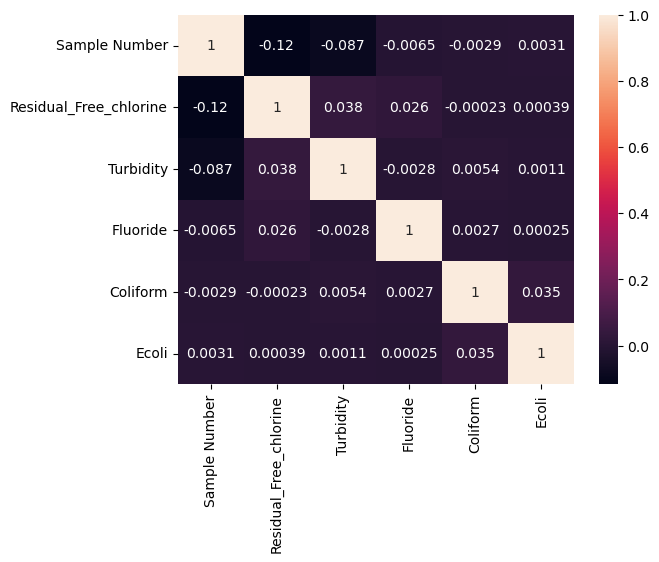

In [49]:
#heatmap
sns.heatmap(df3.corr(),annot=True)
plt.show

### The features are not significantly correlated.

## Hypothesis:There is a seasonal variation in water quality, with higher levels of residual free chlorine observed during warmer months.

In [50]:
df4=df3.copy()
df4['Sample Date'] = pd.to_datetime(df4['Sample Date'])
#Create a new column as Month
df4['Month'] = df4['Sample Date'].dt.month
df4

,Sample Number,Sample Date,Sample Time,Sample Site,Sample class,Residual_Free_chlorine,Turbidity,Fluoride,Coliform,Ecoli,Month
18,202120277.0,2021-07-01,08:18,1S03,Operational,0.72,0.72,0.71,1.0,1.0,7
19,202120278.0,2021-07-01,09:41,1S03A,Operational,0.92,0.78,0.73,1.0,1.0,7
20,202120279.0,2021-07-01,09:17,1S03B,Operational,0.72,0.76,0.72,11.1,1.0,7
21,202120280.0,2021-07-01,08:36,1SCH3,Operational,0.64,0.97,0.72,1.0,1.0,7
22,202120281.0,2021-07-01,08:44,1SCL1,Operational,0.81,0.18,0.69,1.0,1.0,7
...,...,...,...,...,...,...,...,...,...,...,...
126247,202307961.0,2023-03-31,08:05,1S03,Operational,0.65,0.58,0.70,1.0,1.0,3
126248,202307962.0,2023-03-31,09:39,1S03A,Operational,0.81,0.71,0.69,1.0,1.0,3
126249,202307963.0,2023-03-31,09:07,1S03B,Operational,0.69,0.68,0.69,1.0,1.0,3
126250,202307964.0,2023-03-31,07:29,1SCH3,Operational,0.60,0.66,0.69,1.0,1.0,3


In [51]:
seasonal_data = df4.groupby('Month')['Residual_Free_chlorine'].max()
seasonal_data

Month
1     1.27
2     1.20
3     1.76
4     1.28
5     1.56
6     1.20
7     1.23
8     2.20
9     1.46
10    1.80
11    2.20
12    1.20
Name: Residual_Free_chlorine, dtype: float64

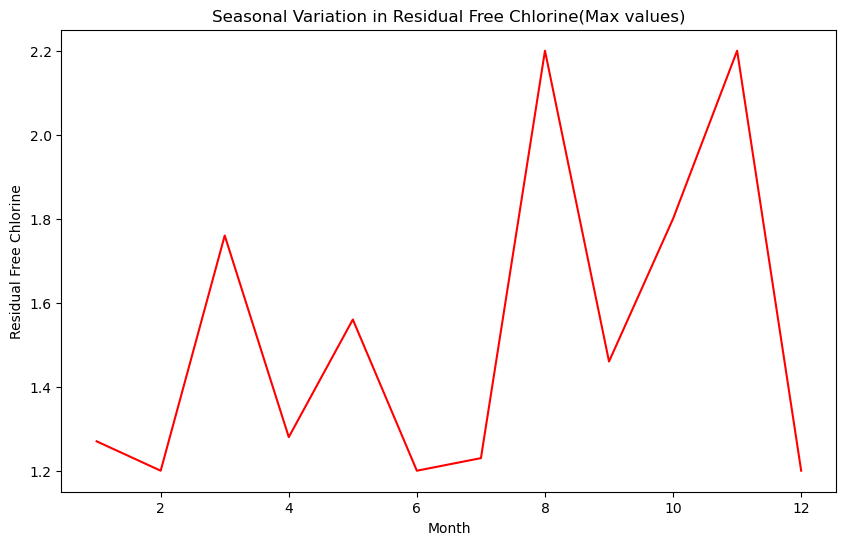

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(seasonal_data.index, seasonal_data.values,color='red')
plt.xlabel('Month')
plt.ylabel('Residual Free Chlorine')
plt.title('Seasonal Variation in Residual Free Chlorine(Max values)')
plt.show()

In [53]:
seasonal_data = df4.groupby('Month')['Residual_Free_chlorine'].mean()
seasonal_data

Month
1     0.573591
2     0.555263
3     0.545882
4     0.519010
5     0.522844
6     0.555905
7     0.551016
8     0.592130
9     0.599828
10    0.603906
11    0.623542
12    0.614566
Name: Residual_Free_chlorine, dtype: float64

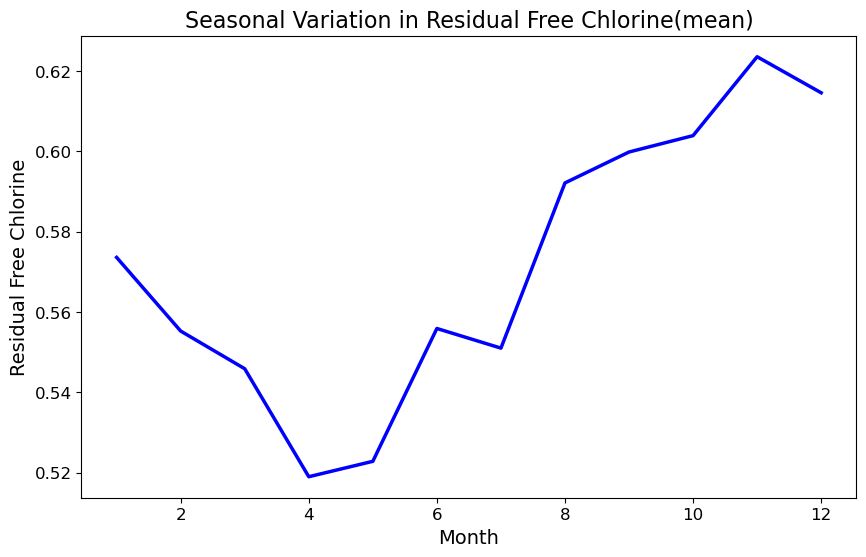

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(seasonal_data.index, seasonal_data.values, color='blue', linewidth=2.5)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Residual Free Chlorine', fontsize=14)
plt.title('Seasonal Variation in Residual Free Chlorine(mean)', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()


## It appears that chlorine levels exhibit a relatively higher trend during the summer months(New york) (June, July, and August) with values of 0.555, 0.551, and 0.592, respectively. 

This suggests that chlorine levels tend to increase during warmer months, potentially due to increased microbial activity and the need for enhanced disinfection.

There seems to be a gradual increase in chlorine levels from the winter months to the summer months (e.g., from February to June). Conversely, a gradual decrease in chlorine levels is observed from the summer months to the winter months (e.g., from August to December). These transition periods may be influenced by changes in water demand, temperature, or other factors.

# Analyse of Residual Free Chlorine

#### *As per WHO the max allowable value for free clorine residual in drinking water is 5mg/L*

In [55]:
df3[df3["Residual_Free_chlorine"] >= 5].sum()

Sample Number             0.0
Sample Date               0.0
Sample Time               0.0
Sample Site               0.0
Sample class              0.0
Residual_Free_chlorine    0.0
Turbidity                 0.0
Fluoride                  0.0
Coliform                  0.0
Ecoli                     0.0
dtype: float64

### None of the samples chlorine more than 5mg/L 

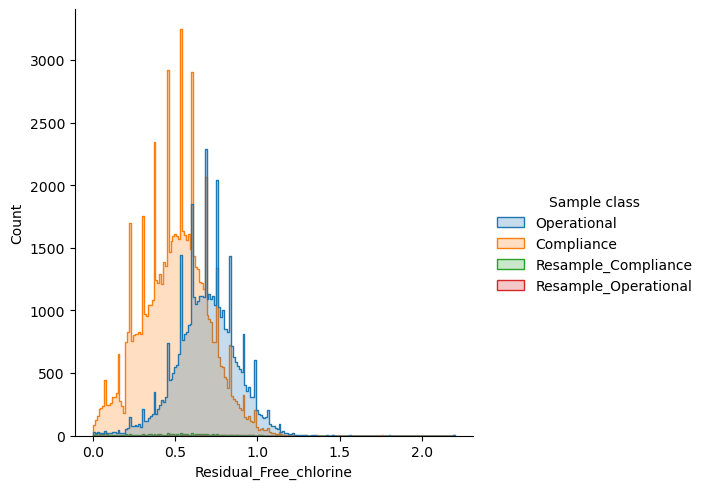

In [56]:
sns.displot(data=df3, x="Residual_Free_chlorine", hue="Sample class",element="step")
plt.show()

### Value of clorine lies between 0 and 1.5
### A large no of samples with sample class complience lies below 1.6

# Analyse of Turbidity

#### *Turbidity, which is caused by suspended chemical and biological particles, can have both water safety and aesthetic implications for drinking-water supplies.*
#### *Turbidity itself does not always represent a direct risk to public health; however, it can indicate the presence of pathogenic microorganisms and be an effective indicator of hazardous events throughout the water supply system, from catchment to point of use.*

#### *Turbidity should ideally be kept below 1 NTU As per WHO*

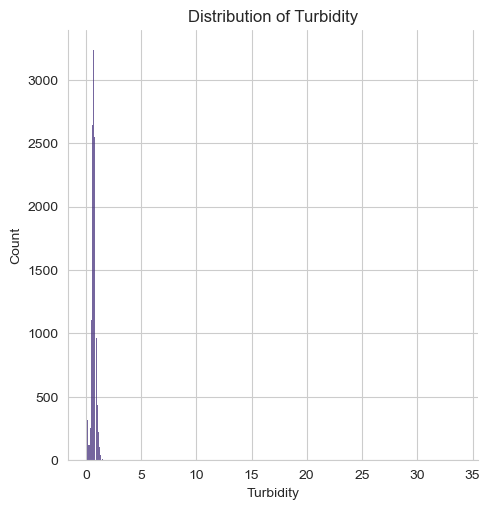

In [57]:
sns.set_style("whitegrid")
sns.set_palette("viridis")

sns.displot(data=df3, x="Turbidity")
plt.xlabel("Turbidity")
plt.ylabel("Count")
plt.title("Distribution of Turbidity")
plt.show()


In [58]:
df3[df3["Turbidity"] > 1]

,Sample Number,Sample Date,Sample Time,Sample Site,Sample class,Residual_Free_chlorine,Turbidity,Fluoride,Coliform,Ecoli
162,202120644.0,07/05/2021,08:02,52550,Compliance,0.67,1.23,0.530796,1.0,1.0
334,202121082.0,07/08/2021,11:13,26550,Compliance,0.60,1.21,0.923414,1.0,1.0
528,202121556.0,07/13/2021,10:45,43950,Compliance,0.10,4.58,0.721744,1.0,1.0
579,202121692.0,07/14/2021,12:01,17950,Compliance,0.79,1.10,0.715727,1.0,1.0
631,202121816.0,07/15/2021,11:58,17750,Compliance,0.85,1.29,0.689788,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
125688,202306799.0,03/17/2023,11:57,46950,Compliance,0.63,1.18,0.790047,1.0,1.0
125689,202306800.0,03/17/2023,08:53,78350,Compliance,0.48,1.13,0.782008,1.0,1.0
125738,202306897.0,03/18/2023,08:38,1S03B,Operational,0.77,1.11,0.740000,1.0,1.0
125884,202307221.0,03/22/2023,11:06,77850,Compliance,0.22,1.08,0.651942,1.0,1.0


In [59]:
high_turb= df3[df3["Turbidity"] > 1].shape[0]
print(high_turb)
total_rec = df3.shape[0]
print((high_turb/total_rec)* 100, "%")

8781
6.956239305405918 %


### 8782 samples have turbidity greater than recomended limit . ie ,6.9 %

In [60]:
locations_high_turbidity= list(df3[df3["Turbidity"] > 1]["Sample Site"])
locations_high_turbidity

['52550',
 '26550',
 '43950',
 '17950',
 '17750',
 '52550',
 '43900',
 '10850',
 '1SCL1',
 '43650',
 '25150',
 '26750',
 '27000',
 '27850',
 '31650',
 '11550',
 '27000',
 '42950',
 '43950',
 '20650',
 '24750',
 '27000',
 '40200',
 '40150',
 '40200',
 '43650',
 '40450',
 '41550',
 '42850',
 '11050',
 '18900',
 '1S03B',
 '35800',
 '44150',
 '76300',
 '79550',
 '20850',
 '1S03B',
 '45250',
 '16250',
 '40200',
 '43750',
 '29850',
 '11450',
 '45000',
 '44350',
 '1S07',
 '11900',
 '14000',
 '18500',
 '18800',
 '40200',
 '13900',
 '26850',
 '41350',
 '40150',
 '23200',
 '25900',
 '34150',
 '40850',
 '40950',
 '42350',
 '42950',
 '43950',
 '77050',
 '77650',
 '25950',
 '50200',
 '50300',
 '59350',
 '1S03B',
 '21050',
 '21350',
 '21950',
 '26950',
 '27000',
 '46250',
 '53550',
 '58250',
 '47150',
 '46100',
 '44700',
 '44350',
 '20850',
 '10250',
 '76450',
 '27750',
 '31950',
 '47550',
 '41600',
 '42300',
 '40750',
 '20750',
 '40200',
 '13550',
 '40850',
 '59050',
 '4ISL5',
 '51350',
 '52450',
 

In [61]:
maxtur= max(set(locations_high_turbidity), key =locations_high_turbidity.count)
print(maxtur)

40200


### sample site 40200 has most no of samples higer than 1NTU

# Analyse of coliform

#### *The World Health Organization (WHO) does not specifically recommend MPN /100 levels for Coliform Quanti-Tray. However, the WHO does recommend that water intended for human consumption should not contain any coliforms or E. coli. If coliforms or E. coli are present, the number of organisms should be as low as possible.*
#### *However, in general, a MPN /100 level of 0 or 1 is considered to be acceptable. A MPN /100 level of 2 or more is considered to be unacceptable.*

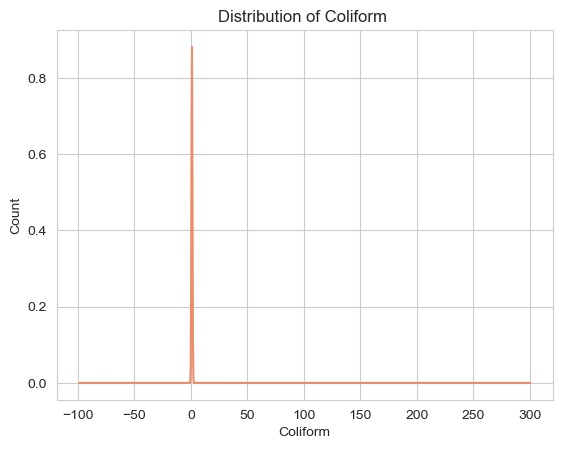

In [62]:
sns.set_style("whitegrid")
sns.set_palette("flare")

df3['Coliform'].plot(kind='kde')
plt.xlabel("Coliform")
plt.ylabel("Count")
plt.title("Distribution of Coliform ")
plt.show()

### most of the samples have Coliform levels that are close to 0.

In [63]:
samples_with_coliform_levels_greater_than_or_equal_to_2 = df3.loc[df3["Coliform"] >= 2]
samples_with_coliform_levels_greater_than_or_equal_to_2

,Sample Number,Sample Date,Sample Time,Sample Site,Sample class,Residual_Free_chlorine,Turbidity,Fluoride,Coliform,Ecoli
20,202120279.0,07/01/2021,09:17,1S03B,Operational,0.72,0.76,0.720000,11.1,1.0
559,202121657.0,07/14/2021,11:57,36950,Compliance,0.29,0.63,0.919502,165.2,1.0
826,202122359.0,07/20/2021,10:01,15450,Compliance,1.01,0.96,0.722525,3.1,1.0
869,202122491.0,07/21/2021,10:56,43900,Operational,0.02,0.56,0.730152,2.0,1.0
951,202122743.0,07/23/2021,10:36,1SCH3,Operational,0.67,0.67,0.720000,200.5,1.0
...,...,...,...,...,...,...,...,...,...,...
117109,202224381.0,08/23/2022,10:04,3SC26,Operational,0.82,0.60,0.762407,11.1,1.0
117461,202225191.0,09/01/2022,09:34,77550,Compliance,0.04,0.57,0.658237,2.0,1.0
117638,202225606.0,09/06/2022,07:48,58250,Compliance,0.14,0.51,0.615721,2.0,1.0
117950,202226266.0,09/13/2022,09:42,15150,Compliance,0.67,0.97,0.630700,6.4,1.0


### 313 samples have unacceptable levels of coliform level

# Analyse of E.coli

#### *According to the World Health Organization, a zero count of E. coli per 100 ml of water is considered safe for drinking. A count of 1–10 MPN/100 ml is regarded as low risk; 11–100 MPN/100 ml is medium risk. Finally, an E. coli count greater than 100 MPN/100 ml is adjudged high risk.*

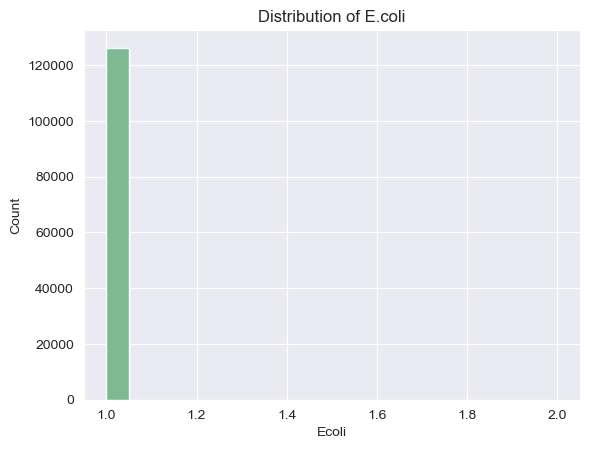

In [64]:
sns.set_style("darkgrid")
sns.set_palette("crest")

df3['Ecoli'].plot(kind='hist',bins=20)
plt.xlabel("Ecoli")
plt.ylabel("Count")
plt.title("Distribution of E.coli")
plt.show()

In [65]:
#low risk samples
samples_with_ecoli_levels_1_to_10 = df3.loc[df["Ecoli"].between(1, 10)]
samples_with_ecoli_levels_1_to_10

,Sample Number,Sample Date,Sample Time,Sample Site,Sample class,Residual_Free_chlorine,Turbidity,Fluoride,Coliform,Ecoli
18,202120277.0,07/01/2021,08:18,1S03,Operational,0.72,0.72,0.71,1.0,1.0
19,202120278.0,07/01/2021,09:41,1S03A,Operational,0.92,0.78,0.73,1.0,1.0
20,202120279.0,07/01/2021,09:17,1S03B,Operational,0.72,0.76,0.72,11.1,1.0
21,202120280.0,07/01/2021,08:36,1SCH3,Operational,0.64,0.97,0.72,1.0,1.0
22,202120281.0,07/01/2021,08:44,1SCL1,Operational,0.81,0.18,0.69,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
126247,202307961.0,03/31/2023,08:05,1S03,Operational,0.65,0.58,0.70,1.0,1.0
126248,202307962.0,03/31/2023,09:39,1S03A,Operational,0.81,0.71,0.69,1.0,1.0
126249,202307963.0,03/31/2023,09:07,1S03B,Operational,0.69,0.68,0.69,1.0,1.0
126250,202307964.0,03/31/2023,07:29,1SCH3,Operational,0.60,0.66,0.69,1.0,1.0


In [66]:
percent=samples_with_ecoli_levels_1_to_10.shape[0]/df3.shape[0]*100
percent

99.95167627859813

### 99.9% samples have low risk (ecoli level)

In [67]:
#medium risk samples
samples_with_ecoli_levels_greater_than_or_equal_to_11 = df3.loc[df["Ecoli"] >= 11]
samples_with_ecoli_levels_greater_than_or_equal_to_11

,Sample Number,Sample Date,Sample Time,Sample Site,Sample class,Residual_Free_chlorine,Turbidity,Fluoride,Coliform,Ecoli


### there is no medium or high risk samples

# Conclusions

conclusion of the exploratory data analysis project on Drinking Water Quality Distribution Monitoring Data:

The results of the exploratory data analysis (EDA) project on Drinking Water Quality Distribution Monitoring Data show that the residual chlorine, fluoride, coliform, and E. coli levels in the compliance sample class are low. This reflects adherence to regulatory standards and demonstrates good water quality management practices.

The EDA also found that turbidity levels in some samples were higher than the recommended limit of 1 NTU. This could be a cause for concern, as turbidity can indicate the presence of pathogenic microorganisms. However, the majority of samples had turbidity levels that were within the recommended limit.

Chlorine levels exhibit a relatively higher trend during the summer months.This suggests that chlorine levels tend to increase during warmer months, potentially due to increased microbial activity and the need for enhanced disinfection.

The EDA also found that there were a small number of samples with unacceptable levels of coliform. This is a concern, as coliform bacteria can cause illness. However, the number of samples with unacceptable levels of coliform was relatively small, and the majority of samples had low risk E. coli levels.

Overall, the results of the EDA show that the drinking water in the compliance sample class is of good quality. However, there are some areas where improvement could be made, such as reducing turbidity levels.

Here are some specific recommendations for improvement:

* Continue to monitor turbidity levels and take steps to reduce turbidity levels in samples that exceed the recommended limit.
*  Enhance monitoring and control systems to closely track chlorine levels during the summer months. Implement real-time monitoring technologies and automated control systems to ensure that chlorine levels remain within the optimal range for effective disinfection.
* Conduct further testing to determine the source of the coliform bacteria in the small number of samples with unacceptable levels of coliform.
* Continue to monitor E. coli levels and take steps to reduce E. coli levels in samples that exceed the recommended limit.